## Exploratory Data Analysis on Insurance dataset
### Importing necessary libraries and modules

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
os.chdir('..')
from scripts.utils import EDA
warnings.filterwarnings('ignore',category=pd.errors.DtypeWarning)

### Loading the dataset

In [2]:
df=pd.read_csv('data/MachineLearningRating_v3.txt',sep='|')
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [3]:
#Creating an instance of the class
cl=EDA(df)

### Examining important information about the data

In [4]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
df[['TotalClaims','TotalPremium']].describe()

,TotalClaims,TotalPremium
count,1.000098e+06,1.000098e+06
mean,6.486119e+01,6.190550e+01
std,2.384075e+03,2.302845e+02
min,-1.200241e+04,-7.825768e+02
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.178333e+00
75%,0.000000e+00,2.192982e+01
max,3.930921e+05,6.528260e+04


- Using the above  .describe data about the `TotalClaims` and the `TotalPremium` columns, There are some things we can say about the variability of the Claim and Premium of the dataset.
    1. In the `TotalClaims` column, all quartiles are at 0, suggesting that the column is mainly populated with 0 values. This observation suggests that a significant portion of individuals do not file claims, a positive trend that should be acknowledged and valued.
    2. There seem to be extremely rare cases where the `TotalClaims` value is negative in the dataset. This can be due to many cases but the probable causes can be:
        * Data Entry Error
        * Overpayment- Our company may have overpaid the claim and plans to correct the error.
        * Fraud- When the policyholder falsely claims a loss, Our company may have reversed the payout, leading in a negative claim value
    3. There seem to be a very high standard deviation value for the `TotalClaims` column. This may happen because the non-zero values of the column have high diversity and variation. 
    4. For the `TotalPremium` column, There is also a predominant value of 0 values but not as much as the `TotalClaims` column. This is obviously because as an insurance company, policyholders pay more than we pay them. 
    5. There are also certain negative values in this columns. Possible reasons can be:
        * Underwriting- The policyholder may represent a higher risk profile than we anticipated. This could lead us to re-evaluate the pricing of the user. 
        * Profitability- A negative premium value may indicate that the company is giving out more in claims than gaining in premium for that particular user. This would negatively impact our company so we need to pay special attention to this users. 

### Data Quality Assessment
-Checking for missing values

In [8]:
null_values=cl.null()
null_values

,column_name,null_count,null_count(%)
38,NumberOfVehiclesInFleet,1000098,100.00
37,CrossBorder,999400,99.93
29,CustomValueEstimate,779642,77.96
35,Rebuilt,641901,64.18
36,Converted,641901,64.18
34,WrittenOff,641901,64.18
33,NewVehicle,153295,15.33
8,Bank,145961,14.59
9,AccountType,40232,4.02
11,Gender,9536,0.95


In [9]:
#Counting how many columns in the dataset have no null values 
null_values[null_values['null_count']==0].count()

column_name      30
null_count       30
null_count(%)    30
dtype: int64

* 30 out of the 52 columns(~58%) have no null values. But there are also some columns where more than 75% of the entry are null. Since we don't have to use most of these columns for our exploratory analysis or future prediction, we just leave them as they are.

### Plotting the graph of some important features in the dataset

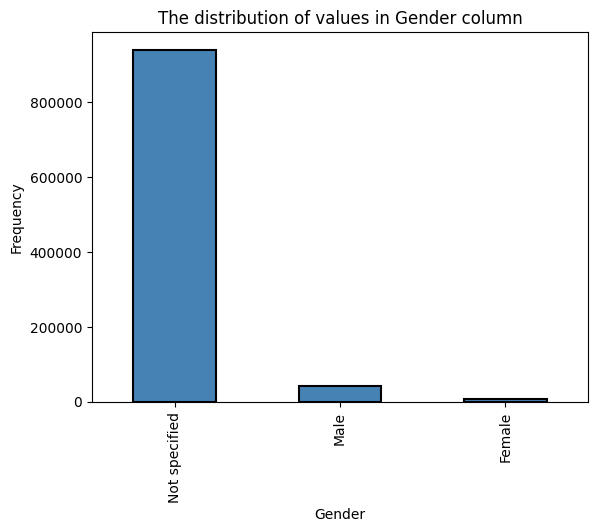

In [31]:
#Bar chart for Gender column
cl.plot_data(column='Gender')

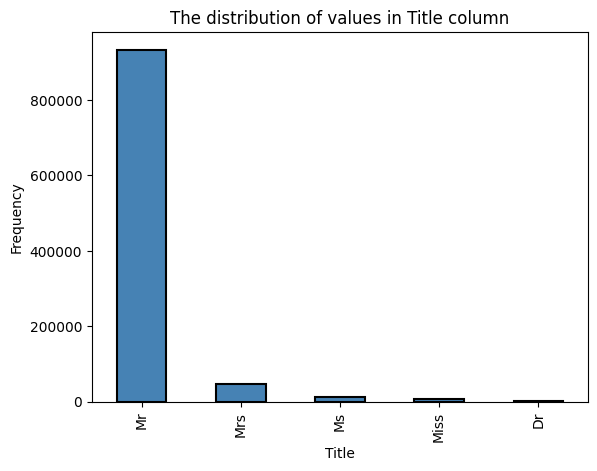

In [32]:
cl.plot_data(column='Title')

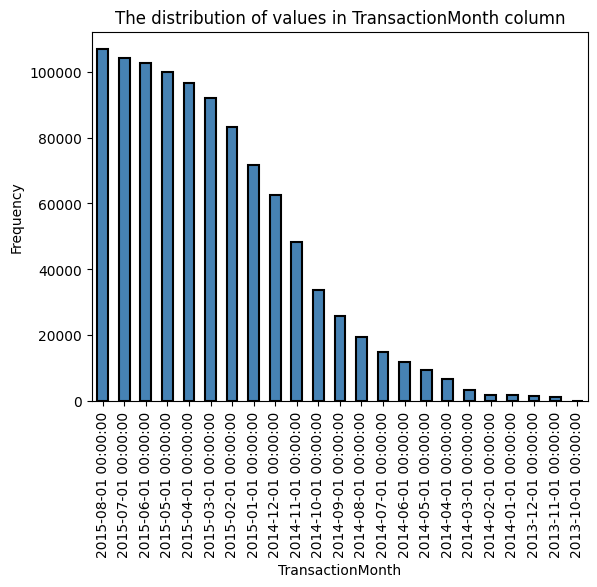

In [11]:
#Bar chart for the transactionMonth column
cl.plot_data(column='TransactionMonth')

* We can see from the above plot that the transaction of our insurance company is increasing with respect to time.

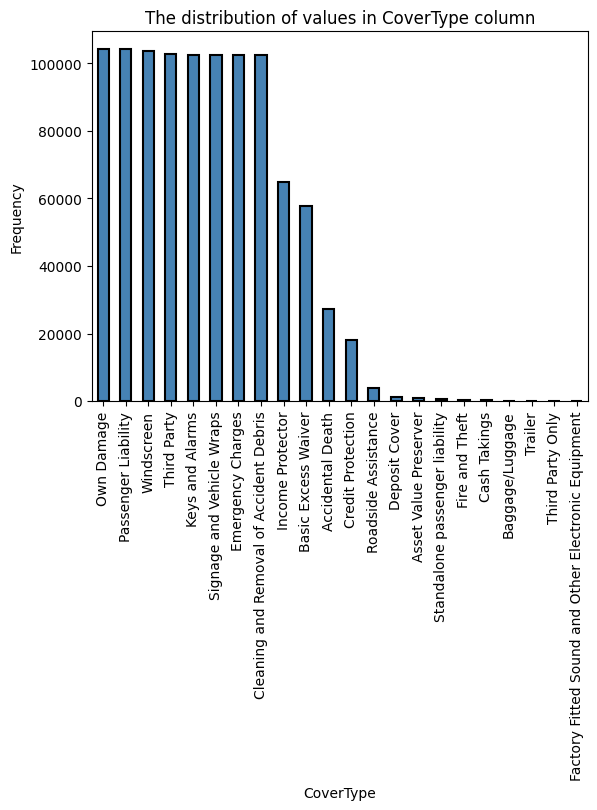

In [12]:
#Bar chart for the CoverType (The reason they ask for the claim)
cl.plot_data(column='CoverType')

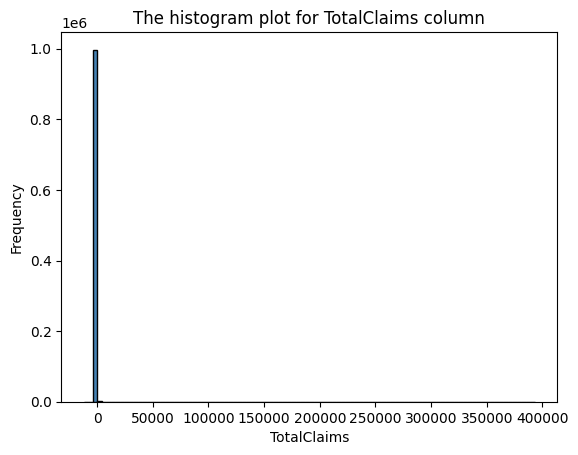

In [13]:
#TotalClaims plotted using
cl.plot_data(column='TotalClaims')

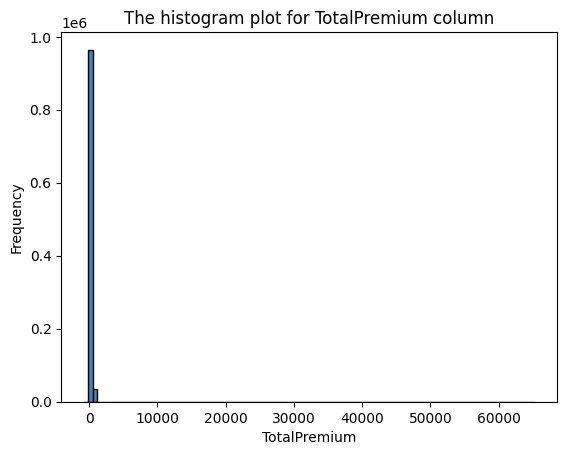

In [14]:
#TotalPremium plotted using histogram
cl.plot_data(column='TotalPremium')

* Like we said above, The data is concentrated around the values of 0 for both `TotalClaims` and `TotalPremium` columns. 

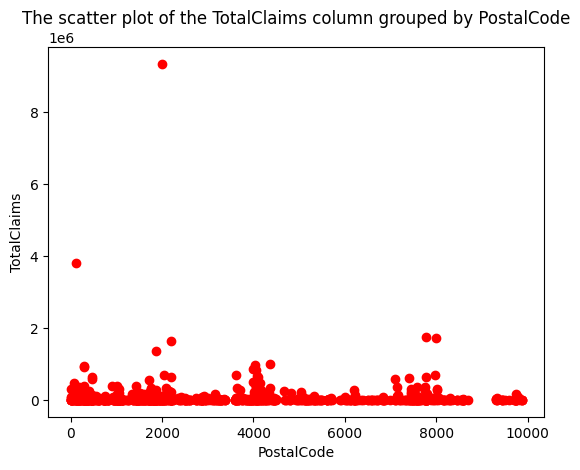

In [5]:
cl.scatter_postalcode('TotalClaims')

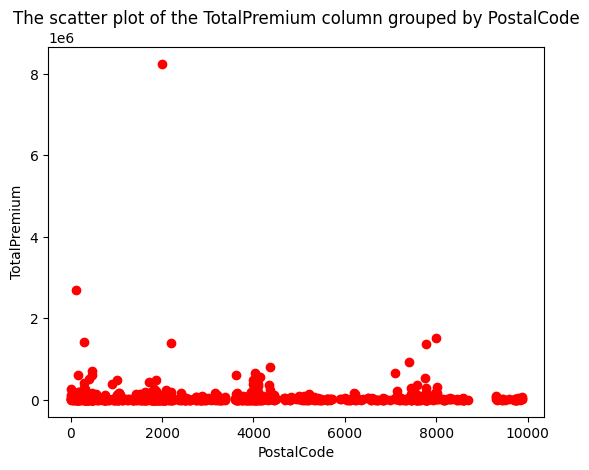

In [6]:
cl.scatter_postalcode('TotalPremium')

<Axes: >

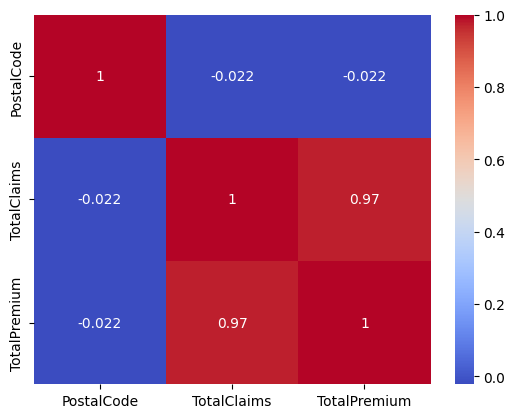

In [7]:
corr=cl.corr()
corr

* As we can see, The correlation of the `PostalCode` column with `TotalClaims` and `TotalPremium` seems to be negligible. When we group the data using `PostalCode` however, The correlation of `TotalClaims` and `TotalPremium` seems to be very high (almost perfect). This indicates that for every postalcode, there seems to be an equal portion of premium paid to the insurer and claim given to the policyholder.


### Trend by Geography

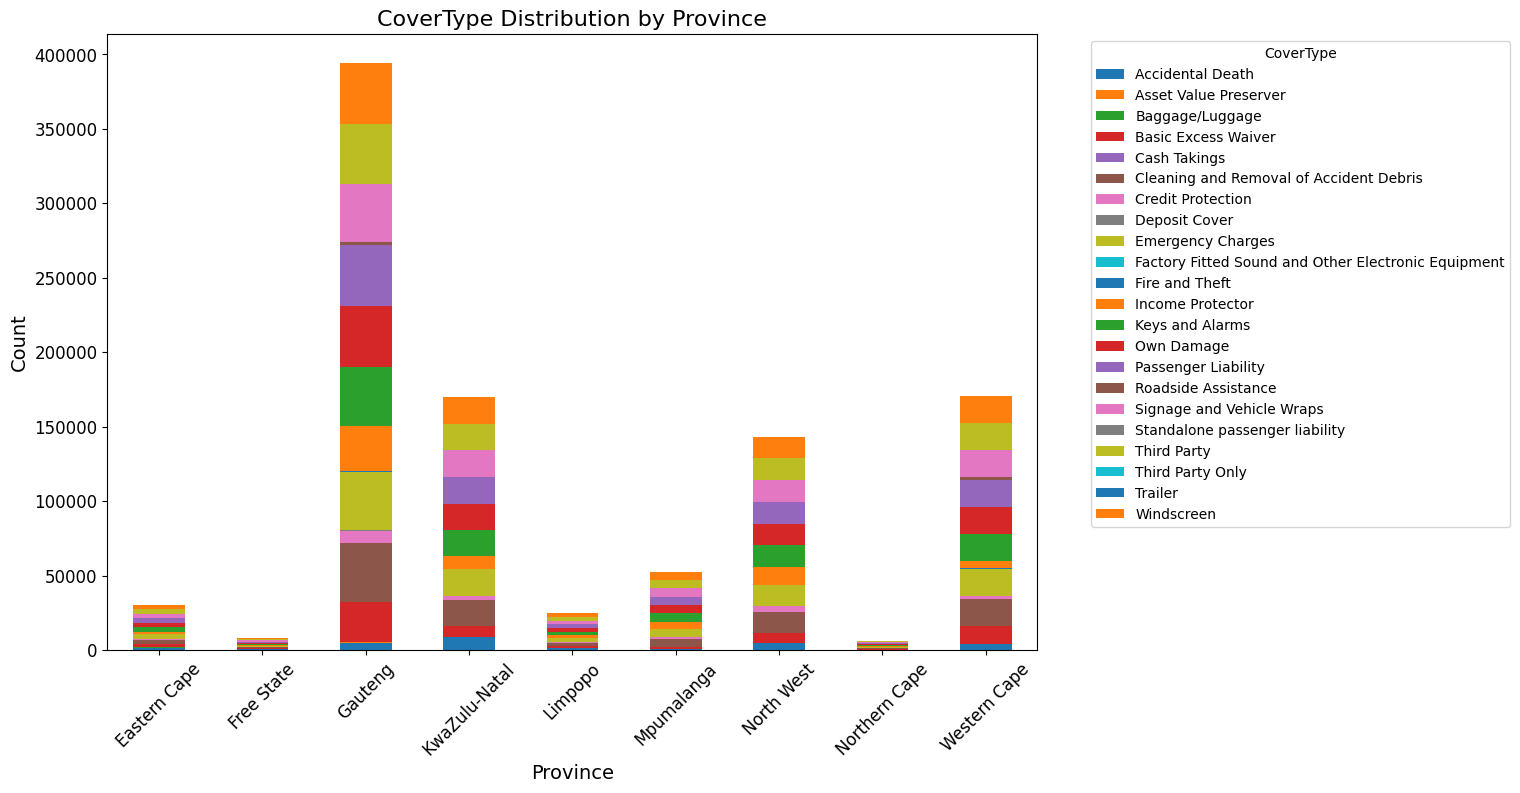

In [8]:
cl.plot_province('CoverType')

* When classified by `Province`, **Gauteng** dominates the count by a mile. And for this Provice, The main Cover types are:
    - **Own Damage**
    - **Passenger Liability**
    - **Windscreen** 
* **Northern Cape** and **Free State**  have the smallest count. This means that we have a very few customers from those provinces. Marketing strategies that can be applied to increase customer from this provinces are:
    1. Sponsoring community services in that province.
    2. Releasing tailored marketing messages to resonate with the local culture and values.
    3. Offering free educational sessions on how insurance is important.
    4. Utilize social media and Google Ads to target specific demographics in the province.
    5. Learning from the marketing measures that is applied on successful provinces like Gauteng.
    

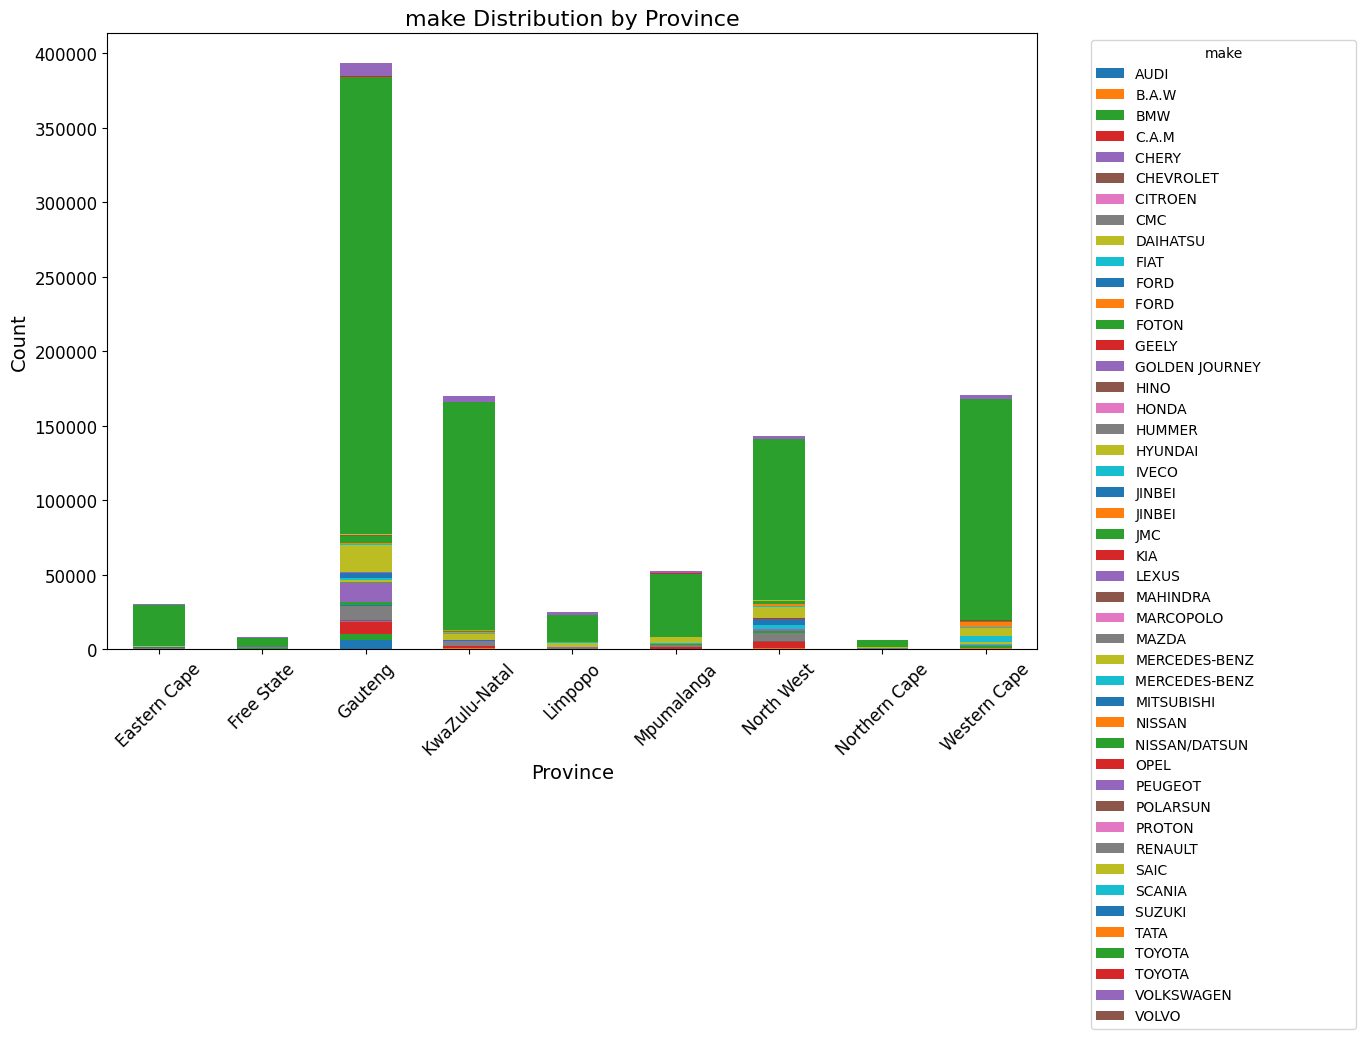

In [9]:
cl.plot_province('make')

* For the `make` category and in most of the provinces, **Toyota** dominates the car make by an absolute margin(The color green in the above graph). This may be becasue Toyota is the largest car manufacturer in the world and the same stat applied for the provinces. 

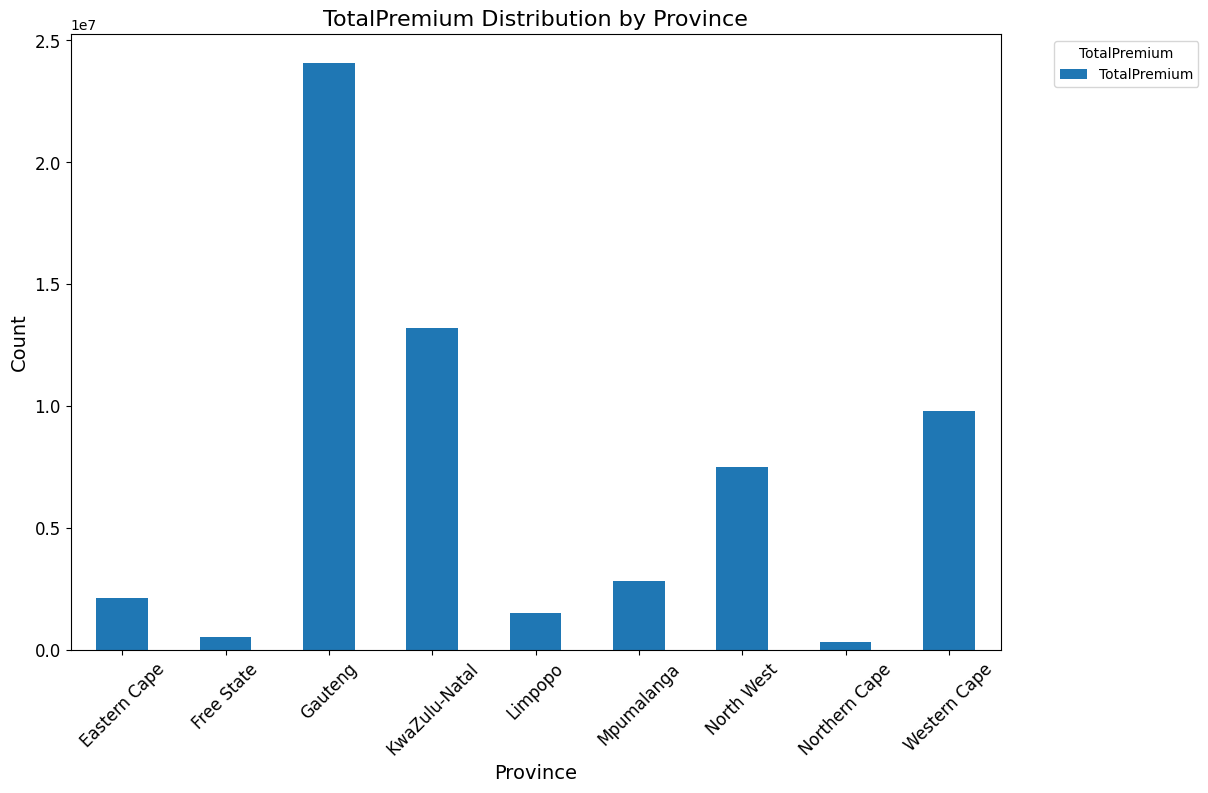

In [10]:
cl.plot_province('TotalPremium')

**Fun fact:** `Gauteng` has more customers than the next 2 biggest provinces (`KwaZulu-Natal` and `Western Cape`)

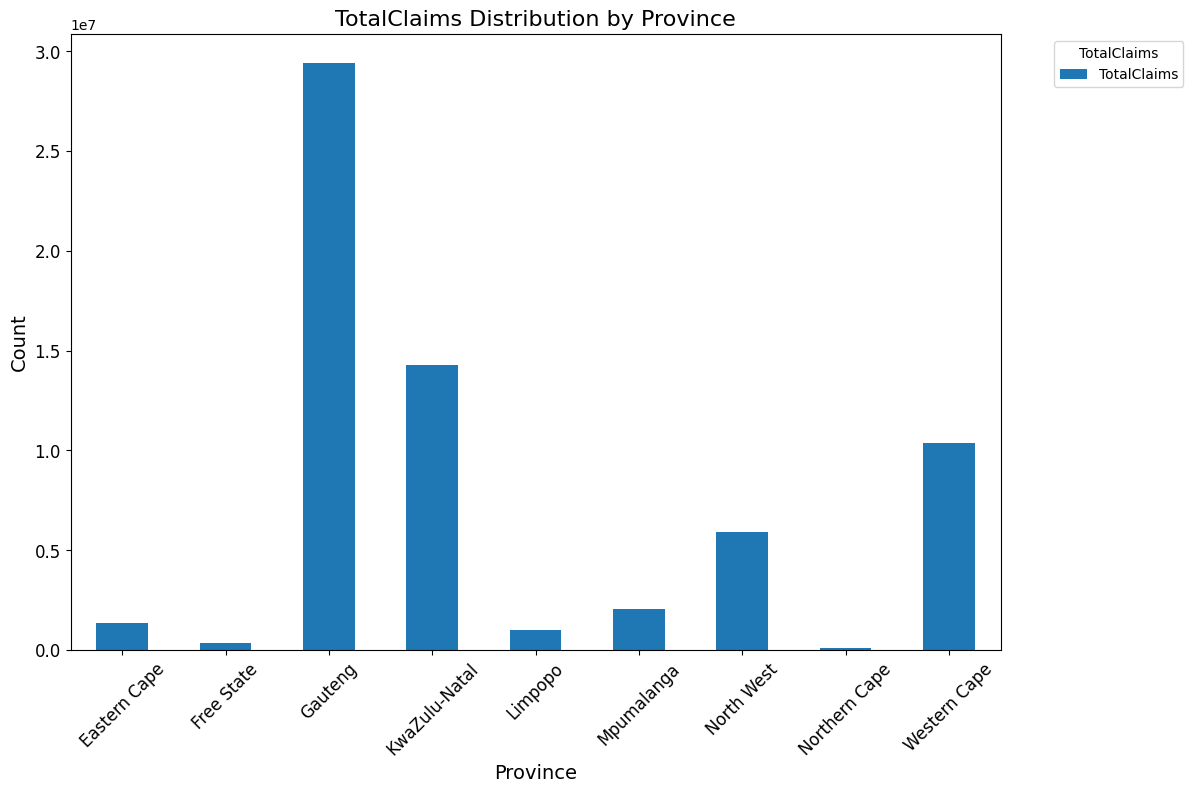

In [11]:
cl.plot_province('TotalClaims')

### Outlier Detection

<Axes: >

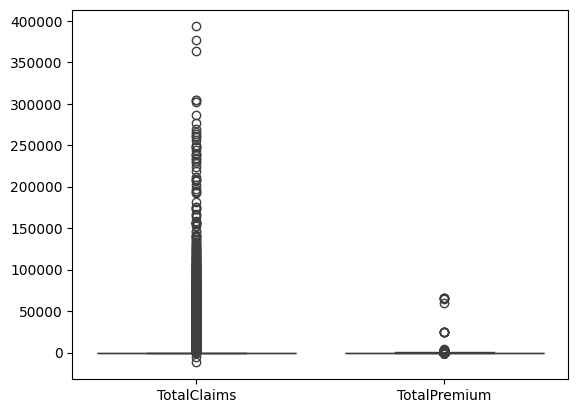

In [39]:
sns.boxplot(data=df[['TotalClaims','TotalPremium']])

* For the `TotalClaims` column:
    - By the darkness of the points, we can see that most of the Claim are between 0 and  150,000 ZAR. 
    - There are 6 users who asked for more than 300,000 ZAR as a claim and special attention must be given to this type of customer since this customers pay a much lower premium and ask for large claim. They are a net loss for our company.
* For the `TotalPremium` column:
    - The payment in premium is even more concentrated than the claim paid by us. This is fine since we accept our premium monthly. There are certain outliers in this column as well. We need to provide special service for this kind of customers since these customers pay us more than any customers.

### Some general plots from the dataset

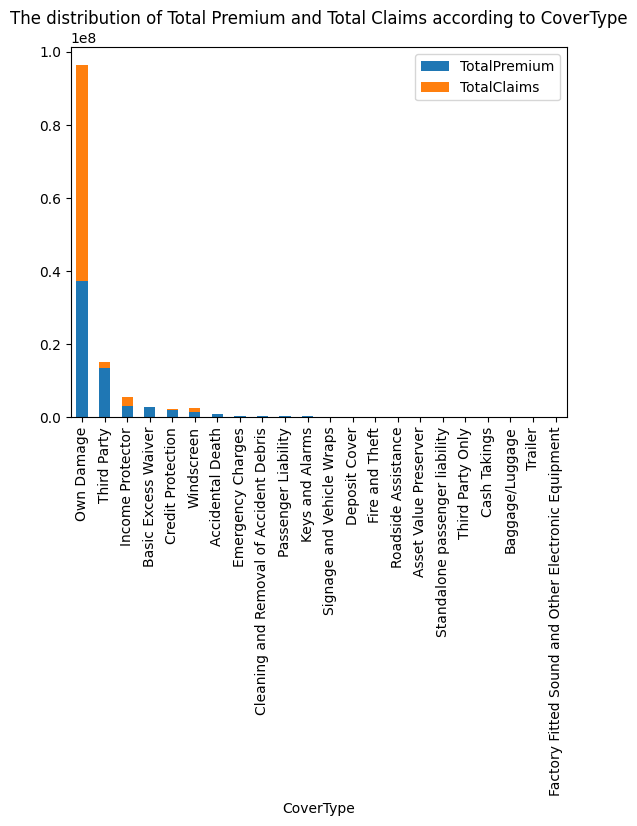

In [12]:
#This plot sums up all the claims and premiums per CoverType
cl.plot_group('CoverType')

* Observations made from the above plot:
    - The Cover Type `Own Damage` pay the most premium and also claim the most. But since their claim cost is more than their premium payment, they are a net loss for our company. Some measures that can be taken to fix this are: 
        1. Introducing a claim limit- implementing a cap for the claim limit for some customers may fix this issue.
        2. Promoting other cover types.
        3. Creating rewards for policyholders who maintain a low claim history over time by reducing their premium payment.
    - The cover type `Third Party` are our best customers since they pay a large amount in premium but rarely ask for claims. Marketing strategies for this cover types can be: 
        1. Implement loyalty programs that offer discounts
        2. Introduce a no-claims discount that rewards customers for not making claims over a specified period 
         

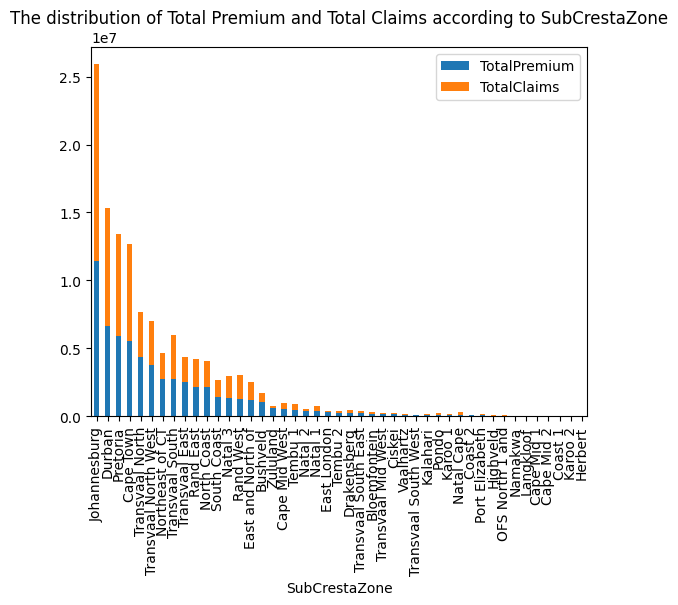

In [13]:
cl.plot_group('SubCrestaZone')

- **Johannesburg** has the highest number interms of TotalClaims and TotalPremium. This is anticipated, as Johannesburg is the provincial capital of `Gauteng`, which is the largest city in South Africa interms of population.
- **Durban** is the second largest city interms of TotalPremium and TotalClaims. As expected, Durban is also the largest city in the province of `KwaZulu-Natal`, the second largest province in South Africa. 
- **Cape Town** is the largest city in the province of `Western Cape`.
- **Pretoria** is the second largest city in the province of `Gauteng`

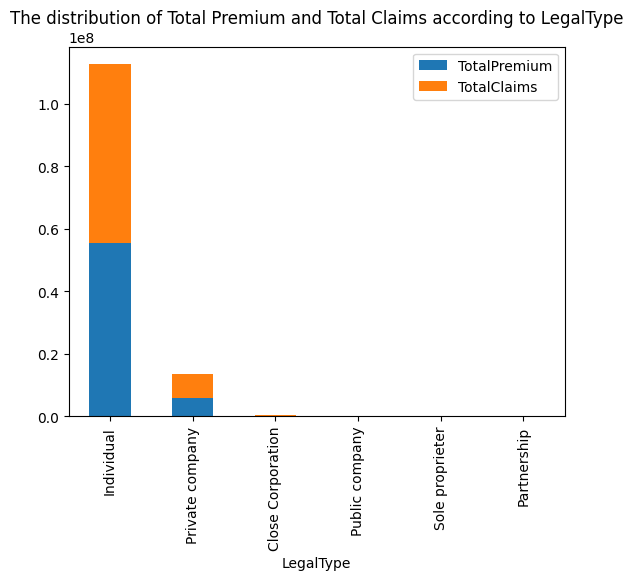

In [14]:
cl.plot_group('LegalType')

* The data is dominated by individual customers. However, we aim to collaborate with Close Corporations and Public Companies to secure a larger premium amount.Close Corporations are like private companies. Strategies to increase these insurances can be:
    - **Customized Messaging:** Craft messages that emphasize the benefits of higher coverage amounts, such as liability protection and asset security.
    - **Discounts:** Offer discounts or incentives for close corporations that increase their insurance amounts.
    - **One-on-One Consultations:** Provide personalized consultations for close corporations to assess their specific insurance needs and recommend appropriate coverage levels.

In [29]:
df['Title'].unique()

array(['Mr', 'Dr', 'Miss', 'Mrs', 'Ms'], dtype=object)